<a href="https://colab.research.google.com/github/ARPRAHMAN/AI_Problems/blob/AI/AI_W5_6168.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Topic**


*   Knowledge Graph (Visualization)

**Visualization**
1.   Network x (Tree basis) https://networkx.org/
2.   matplotlib https://matplotlib.org/stable/gallery/index.html
1.   Seaborn https://seaborn.pydata.org/examples/index.html



# Network X


*   pyvis - network X
*   import networkx as nx
*   matplotib

**if networkx work with tree**
*   add_node()
*   add_node from()
*   add_edge()

 **Network X visualization**
1.   pos = nx.spring layout()
2.   nx.draw(G, pos, with labels)
1.   plot.show()
2.   G = nx.Graph()
1.   DG = nx.DiGraph()













In [1]:
!pip install network pyvis

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.4 MB/s eta 0:00:00
  Created wheel for network: filename=network-0.1-py3-none-any.whl size=3138 sha256=9fe9eec46e50e372c3fbc0710e0230767ffe8328be009604c8ba0ecb0bdc9b63
  Stored in directory: /root/.cache/pip/wheels/e7/5a/7a/7f15bea66afb5505b9d10cc7bd8964cb77f0ce736df5b104c8
Successfully built network


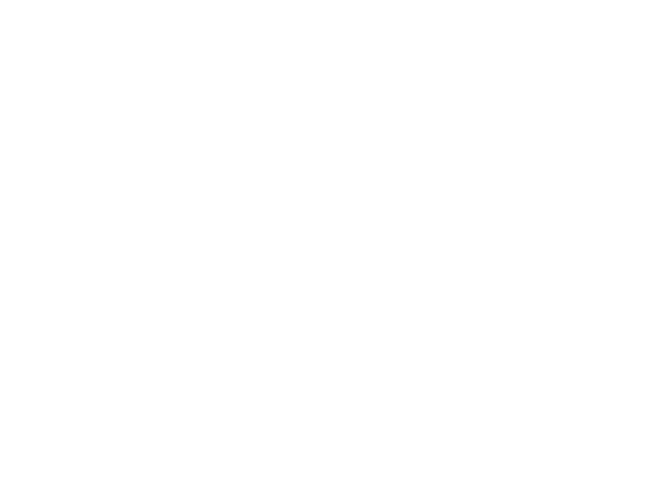

In [5]:
import networkx as nx
from matplotlib import pyplot as plt

#create different type of graphs

G = nx.Graph()
DG = nx.DiGraph()

#basic visualization
pos = nx.spring_layout(G)
nx.draw(G, pos)
plt.show()


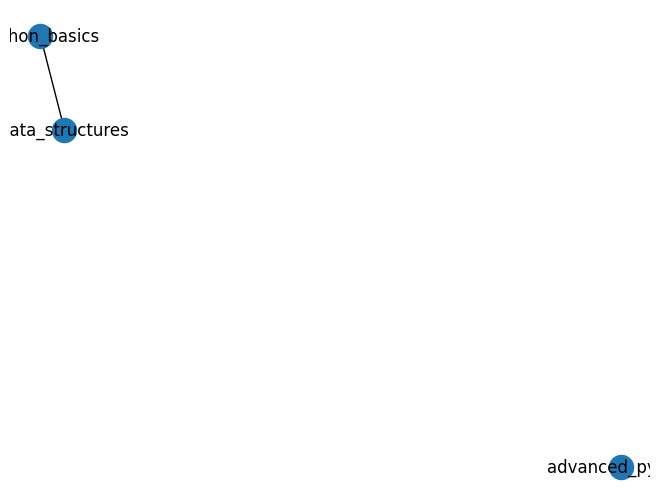

In [12]:
G.add_node('python_basics')
G.add_nodes_from(['data_structures','advanced_python'])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

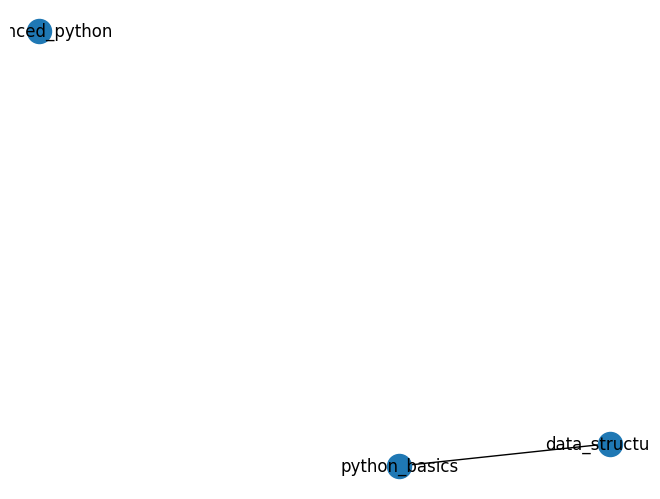

In [13]:
#Adding edges

G.add_edge('python_basics','data_structures')

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

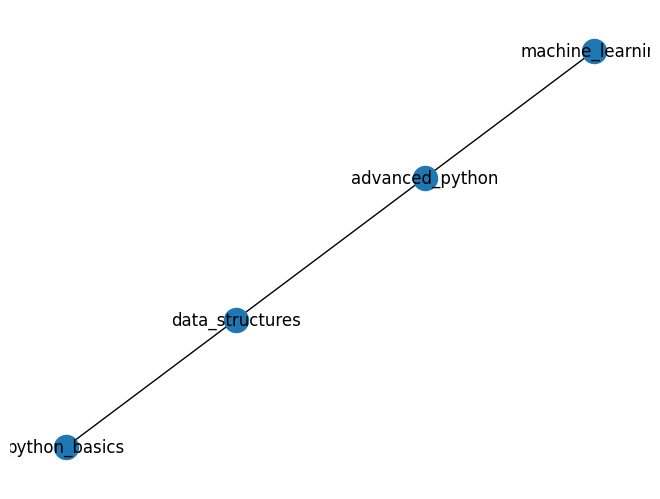

In [14]:
G.add_edges_from([('data_structures','advanced_python'),('advanced_python','machine_learning')])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

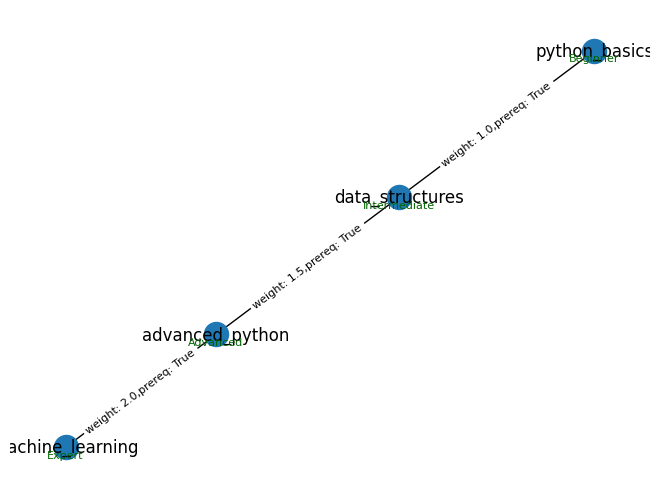

In [18]:
topics= {
    'python_basics':{'difficulty':'Beginner','description': 'Basic python concepts'},
    'data_structures':{'difficulty':'Intermediate','description':'Data structures in Python'},
    'advanced_python':{'difficulty':'Advanced','description':'Advanced python concepts'},
    'machine_learning':{'difficulty':'Expert','description':'Introduction to machine learning'}
}

for node, attrs in topics.items():
    G.nodes[node].update(attrs)

edge_attributes={
    ('python_basics','data_structures'):{'weight':1.0, 'prerequisite':True},
    ('data_structures','advanced_python'):{'weight':1.5,'prerequisite':True},
    ('advanced_python','machine_learning'):{'weight':2.0, 'prerequisite':True}
}

for edge, attrs in edge_attributes.items():
    G.edges[edge].update(attrs)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)

node_labels={node:data['difficulty'] for node, data in G.nodes(data=True)}
for node,(x,y) in pos.items():
    plt.text(x,y - 0.05,node_labels[node], fontsize=8, ha='center', color='darkgreen')

edge_labels= {(u,v):f"weight: {d['weight']},prereq: {d['prerequisite']}"
             for u,v,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,font_size=8)
plt.show()



**Tasks:**

Consider week 1 dataset with an additional feature on expertise details. Now apply DFS to find out the right path for developer and then display it with different colors.
Expertise: [python, AI developer, backend, java ,researh, python]


DFS Path: ['5', '3', '2', '4', '8']
Expertise Path: 5 (Beginner) → 3 (Intermediate) → 2 (Intermediate) → 4 (Advanced) → 8 (Expert)


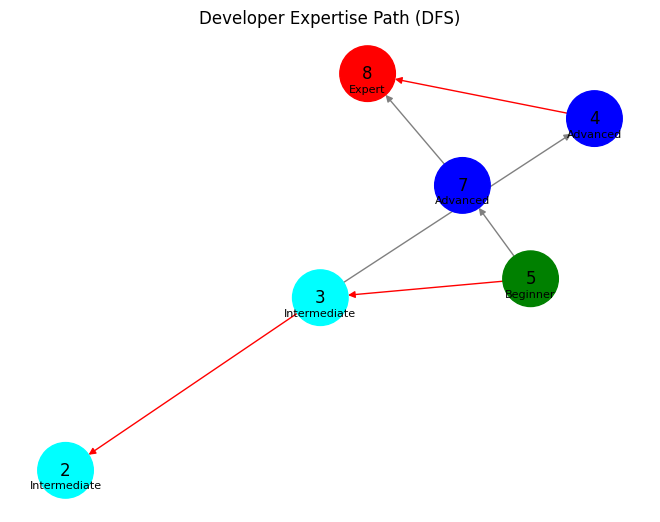

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
dataset = {
    '5': ['3', '7'],
    '3': ['2', '4'],
    '7': ['8'],
    '2': [],
    '4': ['8'],
    '8': []
}

expertise = {
    '5': 'Beginner',
    '3': 'Intermediate',
    '2': 'Intermediate',
    '4': 'Advanced',
    '7': 'Advanced',
    '8': 'Expert'
}


G = nx.DiGraph(dataset)
nx.set_node_attributes(G, expertise, 'level')

def dfs_path(G, start, goal, path=None):
    path = path or []
    path += [start]
    if start == goal:
        return path
    for n in G.neighbors(start):
        if n not in path:
            new_path = dfs_path(G, n, goal, path)
            if new_path:
                return new_path
    return None

path = dfs_path(G, '5', '8')
expertise_path = [f"{n} ({G.nodes[n]['level']})" for n in path]

print("DFS Path:", path)
print("Expertise Path:", " → ".join(expertise_path))

color_map = {'Beginner':'green','Intermediate':'cyan','Advanced':'blue','Expert':'red'}
node_colors = [color_map[G.nodes[n]['level']] for n in G.nodes]
edge_colors = ['red' if (u, v) in zip(path, path[1:]) else 'gray' for u, v in G.edges()]

pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, node_size=1600, arrows=True)

for node, (x, y) in pos.items():
    plt.text(x, y - 0.08, G.nodes[node]['level'], fontsize=8, ha='center')

plt.title("Developer Expertise Path (DFS)", fontsize=12)
plt.show()
